# Benchmarking to Jorgenson 2022
- This notebook benchmarks approximatly to the R scripst of Jorgenson. We would not expect the answers to be the same, but the statistics should be broadly similar

In [1]:
import Thermobar as pt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## Load in test dataset

In [2]:
out_test=pt.import_excel('Jorgenson_Test_dataset.xlsx',
                          sheet_name='Data_For_Corin_Thermobar')
out_test_input=out_test['my_input']
Cpx_test=out_test['Cpxs']
Liq_test=out_test['Liqs']

c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\import_export.py:373: UserWarning: You've got a column heading with a lower case _liq, this is okay if this column is for your own use, but if its an input to Thermobar, it needs to be capitalized (_Liq)
  w.warn("You've got a column heading with a lower case _liq, this is okay if this column is for your"


## Cpx-Liq barometer

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


R2 Thermobar=0.53
RMSE Thermobar=2.32
R2 R=0.40
RMSE R=2.85


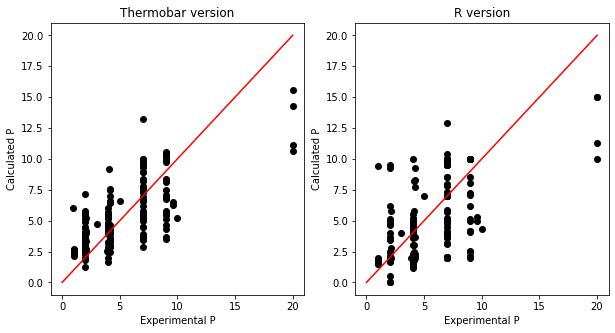

In [3]:
P_Calc_CL=pt.calculate_cpx_liq_press(cpx_comps=Cpx_test, liq_comps=Liq_test, 
equationP="P_Jorgenson2022_Cpx_Liq")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Thermobar version')
ax1.plot(out_test_input['P_kbar_x'], P_Calc_CL['P_kbar_calc'], 'ok')
ax1.plot([0, 20], [0, 20], '-r')
Stats=pt.calculate_R2(out_test_input['P_kbar_x'], P_Calc_CL['P_kbar_calc'])
print('R2 Thermobar='+str(Stats['R2']))
print('RMSE Thermobar='+str(Stats['RMSE']))
ax1.set_xlabel('Experimental P')
ax1.set_ylabel('Calculated P')


ax2.set_title('R version')
ax2.set_xlabel('Experimental P')
ax2.set_ylabel('Calculated P')
ax2.plot(out_test_input['P_kbar_x'], out_test_input['P_values_liq'], 'ok')
ax2.plot([0, 20], [0, 20], '-r')
Stats=pt.calculate_R2(out_test_input['P_kbar_x'], out_test_input['P_values_liq'])
print('R2 R='+str(Stats['R2']))
print('RMSE R='+str(Stats['RMSE']))

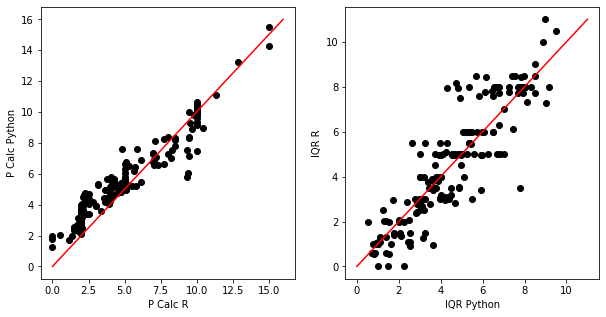

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


ax1.plot(out_test_input['P_values_liq'], P_Calc_CL['P_kbar_calc'], 'ok')
ax1.set_xlabel('P Calc R')
ax1.set_ylabel('P Calc Python')
ax1.plot([0, 16], [0, 16], '-r')

ax2.plot(out_test_input['P_IQR_liq'], P_Calc_CL['IQR_Trees'], 'ok')
ax2.set_ylabel('IQR R')
ax2.set_xlabel('IQR Python')
ax2.plot([0, 11], [0, 11], '-r')

## Cpx-Liq thermometer

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


R2 Thermobar=0.81
RMSE Thermobar=50.70
R2 R=0.79
RMSE R=50.54


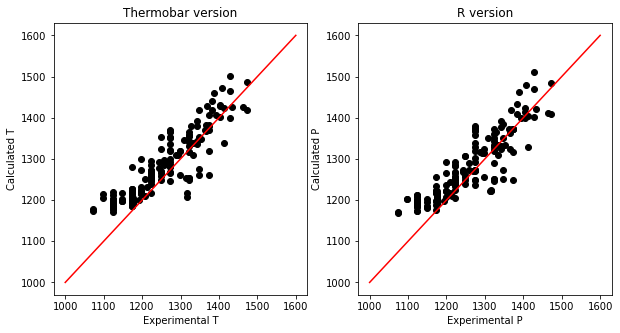

In [5]:
T_Calc_CL=pt.calculate_cpx_liq_temp(cpx_comps=Cpx_test, liq_comps=Liq_test, 
equationT="T_Jorgenson2022_Cpx_Liq")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Thermobar version')
ax1.plot(out_test_input['T_K_x'], T_Calc_CL['T_K_calc'], 'ok')
ax1.plot([1000, 1600], [1000, 1600], '-r')
Stats=pt.calculate_R2(out_test_input['T_K_x'], T_Calc_CL['T_K_calc'])
print('R2 Thermobar='+str(Stats['R2']))
print('RMSE Thermobar='+str(Stats['RMSE']))
ax1.set_xlabel('Experimental T')
ax1.set_ylabel('Calculated T')


ax2.set_title('R version')
ax2.set_xlabel('Experimental P')
ax2.set_ylabel('Calculated P')
ax2.plot(out_test_input['T_K_x'], out_test_input['T_values_liq']+273.15, 'ok')
ax2.plot([1000, 1600], [1000, 1600], '-r')
Stats=pt.calculate_R2(out_test_input['T_K_x'], out_test_input['T_values_liq']+273.15)
print('R2 R='+str(Stats['R2']))
print('RMSE R='+str(Stats['RMSE']))

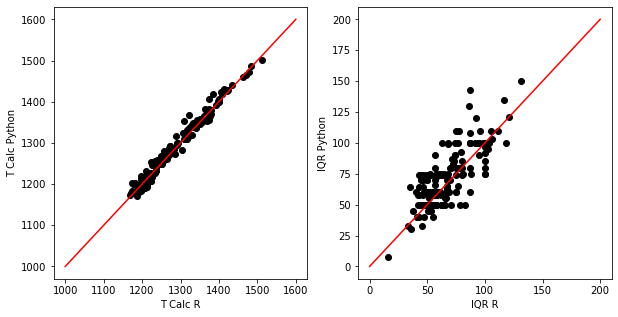

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


ax1.plot(out_test_input['T_values_liq']+273.15, T_Calc_CL['T_K_calc'], 'ok')
ax1.set_xlabel('T Calc R')
ax1.set_ylabel('T Calc Python')
ax1.plot([1000, 1600], [1000, 1600], '-r')

ax2.plot(out_test_input['T_IQR_liq'], T_Calc_CL['IQR_Trees'], 'ok')
ax2.set_xlabel('IQR R')
ax2.set_ylabel('IQR Python')
ax2.plot([0, 200], [0, 200], '-r')

## Cpx only barometer

R2 Thermobar=0.55
RMSE Thermobar=2.30
R2 R=0.42
RMSE R=2.80


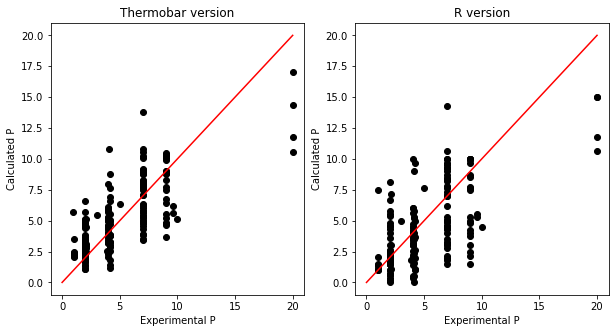

In [7]:
P_Calc_C=pt.calculate_cpx_only_press(cpx_comps=Cpx_test, 
equationP="P_Jorgenson2022_Cpx_only")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Thermobar version')
ax1.plot(out_test_input['P_kbar_x'], P_Calc_C['P_kbar_calc'], 'ok')
ax1.plot([0, 20], [0, 20], '-r')
Stats=pt.calculate_R2(out_test_input['P_kbar_x'], P_Calc_C['P_kbar_calc'])
print('R2 Thermobar='+str(Stats['R2']))
print('RMSE Thermobar='+str(Stats['RMSE']))
ax1.set_xlabel('Experimental P')
ax1.set_ylabel('Calculated P')


ax2.set_title('R version')
ax2.set_xlabel('Experimental P')
ax2.set_ylabel('Calculated P')
ax2.plot(out_test_input['P_kbar_x'], out_test_input['P_values_noliq'], 'ok')
ax2.plot([0, 20], [0, 20], '-r')
Stats=pt.calculate_R2(out_test_input['P_kbar_x'], out_test_input['P_values_noliq'])
print('R2 R='+str(Stats['R2']))
print('RMSE R='+str(Stats['RMSE']))

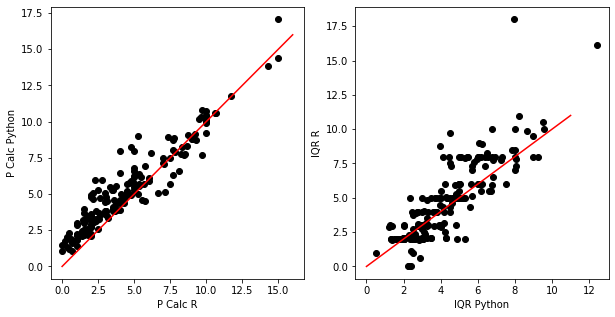

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


ax1.plot(out_test_input['P_values_noliq'], P_Calc_C['P_kbar_calc'], 'ok')
ax1.set_xlabel('P Calc R')
ax1.set_ylabel('P Calc Python')
ax1.plot([0, 16], [0, 16], '-r')

ax2.plot(out_test_input['P_IQR_noliq'], P_Calc_C['IQR_Trees'], 'ok')
ax2.set_ylabel('IQR R')
ax2.set_xlabel('IQR Python')
ax2.plot([0, 11], [0, 11], '-r')

##  Cpx only thermometer

R2 Thermobar=0.45
RMSE Thermobar=105.31
R2 R=0.40
RMSE R=111.72


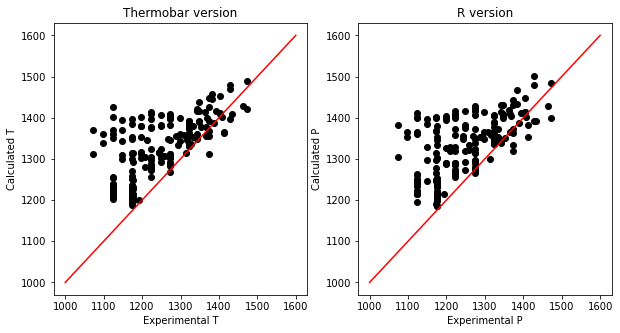

In [9]:
T_Calc_C=pt.calculate_cpx_only_temp(cpx_comps=Cpx_test,
equationT="T_Jorgenson2022_Cpx_only")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Thermobar version')
ax1.plot(out_test_input['T_K_x'], T_Calc_C['T_K_calc'], 'ok')
ax1.plot([1000, 1600], [1000, 1600], '-r')
Stats=pt.calculate_R2(out_test_input['T_K_x'], T_Calc_C['T_K_calc'])
print('R2 Thermobar='+str(Stats['R2']))
print('RMSE Thermobar='+str(Stats['RMSE']))
ax1.set_xlabel('Experimental T')
ax1.set_ylabel('Calculated T')


ax2.set_title('R version')
ax2.set_xlabel('Experimental P')
ax2.set_ylabel('Calculated P')
ax2.plot(out_test_input['T_K_x'], out_test_input['T_values_noliq']+273.15, 'ok')
ax2.plot([1000, 1600], [1000, 1600], '-r')
Stats=pt.calculate_R2(out_test_input['T_K_x'], out_test_input['T_values_noliq']+273.15)
print('R2 R='+str(Stats['R2']))
print('RMSE R='+str(Stats['RMSE']))

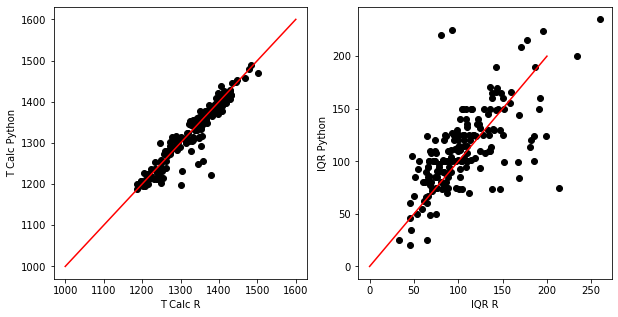

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


ax1.plot(out_test_input['T_values_noliq']+273.15, T_Calc_C['T_K_calc'], 'ok')
ax1.set_xlabel('T Calc R')
ax1.set_ylabel('T Calc Python')
ax1.plot([1000, 1600], [1000, 1600], '-r')

ax2.plot(out_test_input['T_IQR_noliq'], T_Calc_C['IQR_Trees'], 'ok')
ax2.set_xlabel('IQR R')
ax2.set_ylabel('IQR Python')
ax2.plot([0, 200], [0, 200], '-r')

In [11]:
PT_Calc_C=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_test,
equationT="T_Jorgenson2022_Cpx_only", equationP="P_Jorgenson2022_Cpx_only")


Youve selected a P-independent function
Youve selected a T-independent function


In [12]:
PT_Calc_CL=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_test,liq_comps=Liq_test,
equationT="T_Jorgenson2022_Cpx_Liq", equationP="P_Jorgenson2022_Cpx_Liq")


KeyError: "['CO2_Liq'] not found in axis"